In [1]:

import numpy as np                       # mathematical methods
from scipy.optimize import leastsq
from scipy import stats                  # contains some fitting routines
from scipy import signal
from scipy.signal import chirp
from scipy import integrate
from scipy.integrate import quad
from scipy.signal import argrelextrema

#import matplotlib.pylab as plt
from matplotlib import pyplot as plt     # plotting methods within notebook

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.integrate import odeint


%matplotlib inline

## 1. Contourf() and general plotting:


Text(0.5,1,'d = 0.1')

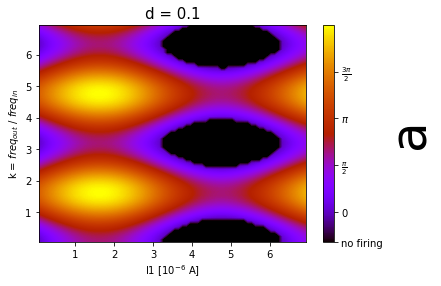

In [32]:
dx, dy = .1, .1
x0, x1 = 0, 7
y0, y1 = 0, 7
x, y = np.mgrid[slice(x0, x1 + dx, dx), slice(y0, y1 + dy, dy)]

z = (np.sin(x) - np.cos(2*y)+ 1)/3 * 2 * np.pi


z = z[:-1, :-1]

for i in range(0,len(z),1):
    for j in range(0,len(z),1):
        if z[i][j] < 0:
            z[i][j] = -1


levels = np.arange(np.min(z), np.max(z), .01)


cmap = plt.get_cmap('gnuplot')

#colors=('black', '#ff9900', '#999900', 'w', '#009999', '#0099ff', '#0000ff', '#ff0000', '#ff9900', '#999900', '#ff0000', '#ff9900', '#999900', '#ff0000', '#ff9900', '#999900')

#norm = BoundaryNorm(levels, ncolors=cmap, clip=True)

array = np.arange(0,1.05, .05)
fig, ax0 = plt.subplots(nrows=1)

cf = ax0.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels, cmap = cmap)


cbar = fig.colorbar(cf, ax=ax0)#, label = r'mean phase $\phi$')
cbar.set_label('a', fontsize = 50)
#cbar[ax](labelsize= 10)
cbar.set_ticks([-1, 0, np.pi/2, np.pi, np.pi * 3/2, np.pi * 2])
cbar.set_ticklabels(['no firing', '0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$' ,r'2$\pi$'])
#cbar.ax.set_yticklabels(['0', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$'], fontsize=15)
#plt.plot(x, 3*np.sin(x))
plt.xlabel(r'I1 [$10^{-6}$ A]')
plt.ylabel(r'k = $freq_{out}$ / $freq_{in}$')
plt.title('d = {}'.format(0.1), fontsize = 15)

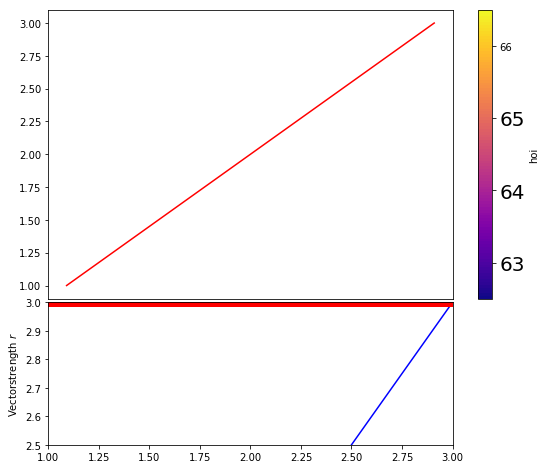

In [21]:
fig = plt.figure(figsize=(14,8))






iinterval = np.arange(1, 2, .11)

min, max = (np.min(iinterval), np.max(iinterval))
mymap = plt.get_cmap('plasma')
step = .01
Z = [[0,0],[0,0]]
levels = np.arange(min,max+step,step)
CS3 = plt.contourf(Z, levels, cmap=mymap)
plt.clf()
ax0 = plt.subplot2grid((3, 3), (0, 0), colspan = 2, rowspan = 2)

ax0.plot([1,2,3], [1,2,3], 'r')
plt.xticks([])
cbar = fig.colorbar(CS3, label = 'Input frequency [Hz]')
cbar.set_ticks((1.125, 1.375, 1.625, 1.875))
cbar.set_ticklabels(("63", "64", "65", "66"))
cbar.set_label('hoi')

plt.subplots_adjust(hspace = .025)
ax1 = plt.subplot2grid((3, 3), (2, 0), colspan = 2)
#fig.add_subplot(3,2,3)
ax1.plot([1,2,3], [1,2,3], 'b')
plt.axis((1,3,2.5,3))
fig.colorbar(CS3, label = 'Input frequency [Hz]')

fig.delaxes(fig.axes[3]) 
plt.ylabel(r'Vectorstrength $r$')
plt.axhline(y=2.995, xmin = 0, xmax = 1, linewidth = 5, color = 'red')


In [11]:
cbar.set_ticklabels?

3.10782614049


[Text(1,0,'No Firing'), Text(1,0,'$3\\pi/2$')]

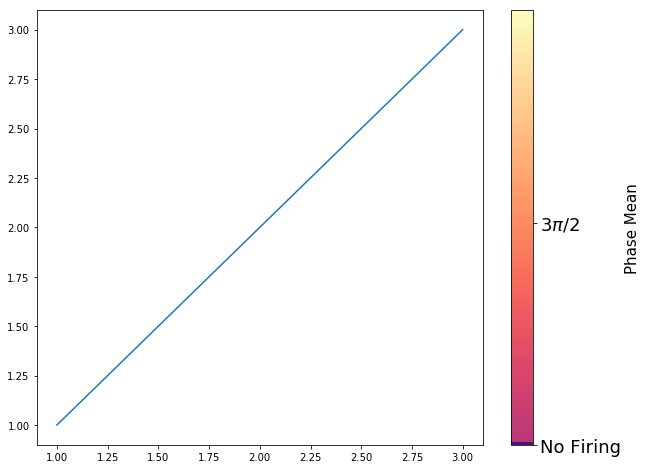

In [15]:
fig = plt.figure(figsize=(10,8))
X_exp = stats.norm(loc = 2.4, scale = .3).rvs(500) #100 Durchführungen
zeros = np.zeros(30)-1
X_exp = np.concatenate((zeros, X_exp))
#print(X_exp)
print(np.max(X_exp))

interval = np.arange(0, 1.05, .05)
interval = np.append(np.zeros(10)-1, interval)
#print(interval)
#interval_color = interval[interval > 0.40]
interval_color = X_exp[X_exp > 0]

#interval_color = np.append(-1, interval_color)
pm_min = np.min(interval_color) #for r
pm_max = np.max(interval_color)
min, max = (pm_min, pm_max)

step = .01
levels = np.arange(min,max +step, step)
levels = np.append(0, levels)
#print(interval_color)
#min, max = (np.min(interval_color), 1.0)
mymap = plt.get_cmap('magma')

#mymap = plt.get_cmap('plasma')
#step = .01
Z = [[0,0],[0,0]]
#levels = np.arange(min,max +step, step)
#levels = np.append(0, levels)
#print(levels)

#print(levels)
CS3 = plt.contourf(Z, levels, cmap=mymap)
plt.clf()
plt.plot([1,2,3], [1,2,3])
#cbar = plt.colorbar(CS3, ticks=[0, np.pi/2, 3*np.pi/4, np.pi])
cbar = plt.colorbar(CS3)
cbar.set_label('Phase Mean', fontsize = 15)
cbar.set_ticks((0, 3*np.pi/4, np.pi))
cbar.ax.set_yticklabels(['No Firing', r'$3\pi/2$', r'$\pi$'], fontsize=18)
#cbar.set_ticklabels(('No Firing', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$'))
#cbar.set_ticklabels(("no firing", ".5", ".6", ".7",".8", ".9", "1.0"))
#colors2 = plt.cm.Reds(np.linspace(0, 1, 256))
#mymap(.5)
#cbar.cmap.set_over('red')
#cbar.set_clim(.6, 1.01)  # Set the limit beyond which everything is red

#cbar2 = cbar.cmap.set_over('red')




#lets change one value:
#print(mymap)    


#ncol = size(newmap, 1)
#ncol = size(newmap,1);           %how big is it?
#zpos = 1 + floor(2/3 * ncol);    %2/3 of way through
#newmap(zpos,:) = [1 1 1];        %set that position to white
#colormap(newmap);                %activate it


In [90]:
cmap.set_over?

Object `cmap.set_over` not found.


## Example Exppulse used as Input:

In [69]:
def e(y, t):
#    a = np.zeros(int(len(t)))
#    for counter, T in enumerate(t, 0):
#        a[counter] = T
    return y[int(t/.01)]
#e(y, 10)
#e(y, 79.99)
#t = np.arange(0, 80, .01)
#odeint(e, [0.0], t)

#e(y, t)
#from scipy.integrate import quad

#def integrand(x):
#    return x**2

#ans, err = quad(e, 0, 1)
#print(ans)
b = 5.0
a = 7.3
tau = 1.0
def y(x):
    return ((a-b) * np.exp(1-x/tau)/tau * x)

ans, err = quad(y, 0, 8)
print(ans)

print(1.0*8)

#y = (a-b) * np.exp(1-t/tau)/tau * t

6.233172248768825
8.0


800 100 700 800


IndexError: index 1003 is out of bounds for axis 0 with size 800

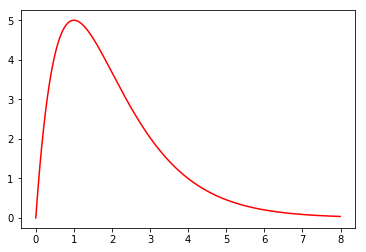

In [62]:
#EXAMPLE spulse
tau = 1
t = np.arange(0 , 8 * tau, .01)
t1 = np.arange(0, 1 * tau, .01)
t2 = np.arange(tau, 8 * tau, .01)
print(len(t), len(t1), len(t2), len(t1) + len(t2))
a = 10 #I1
b = 5
y = (a-b) * np.exp(1-t/tau)/tau * t
y2 = (a-b) * np.exp(1-t/tau)/tau * t #resting state at t = 8*tau
y3 = (a-b) * np.exp(1-t/tau)/tau * t #resting state at t = 8*tau

for tstep in range(0,int(tau/.01)):
    y2[tstep] = (a-b)
    y3[tstep] = 0

for tstep in range(int((tau/2)/.01), int(tau/.01)):
    y3[tstep] = (a-b)

plt.plot(t,y, 'red');

#plt.plot(t,y2, 'b');
#plt.plot(t,y3, 'orange');
#plt.plot(t, 0*t + (a-b), 'r--', label = 'a-b');
#plt.plot(8 * tau + 0*t, np.arange(0,(a-b),(a-b)/7999), 'g--', label = '8Tau');
#plt.plot(0 * tau + 0*t, np.arange(0,(a-b),(a-b)/7999), 'g--', label = '0Tau');
#plt.plot(1 * tau + 0*t, np.arange(0,(a-b),(a-b)/7999), 'g--', label = '1Tau');
plt.legend();

print(y2[1003])


In [14]:
odeint?

[ -0.     6.75  13.25  38.75]


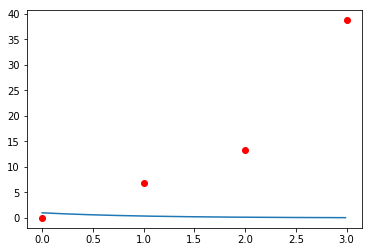

In [70]:
#ireverse = np.arange(6, 7.35, .01)
fnotrev = np.arange(10, 80, .01)

#peaks = np.array([[6, 78.75], [6.75, 40], [7.1, 26.75], [7.25, 20]])
peaks = np.array([[78.75, 40, 26.75, 20], [6, 6.75, 7.1, 7.25]])

distances = np.zeros(len(peaks[0])-1)
for i in range(0, len(peaks[0])-1):
    distances[i] = peaks[0][len(peaks[0])-i-1] - peaks[0][len(peaks[0])-i-2]
distances = np.concatenate(([0], distances))
distances = -distances
print(distances)



plt.plot(np.arange(0,4,1), distances, 'ro')
#plt.plot(peaks[0], peaks[1], 'ro')
#plt.axis((10, 80, 6, 7.35))



        #alternative: fit a curve on oscillation
        
guess_a = 1
guess_b = 1
guess_c = 0
optimize_func = lambda y: y[0] * np.exp(-y[1] * distances) + y[2]
est_a, est_b, est_c = leastsq(optimize_func, [guess_a, guess_b, guess_c])[0]

plt.plot(np.arange(0,3,.01), guess_a * np.exp(-est_b * np.arange(0,3,.01)) + est_c)
        
#fitted_exp_sin = np.exp(-t[10000:(10000+int(dp/dt))]/taus) * est_std * np.sin(t[10000:(10000+int(dp/dt))]*2*np.pi*est_freq) + est_mean - x[0][10000:(10000+int(dp/dt))] - x[0][10000]
        
#print('fitted eigenfrequence is: {}'.format(est_freq))

## Older Versions of spikeresponse():


In [ ]:

def spikeresponse4(derivative, I0, I1, freq, taus) :
    tmax = 600.0
    dt = 0.01
    time = np.arange(int(tmax/dt))*dt #[ 0, dt, 2dt, ... , (tmax / dt) dt = tmax]
    thresh = -20.0
    #taus = 1.0 #changed taus as an input
    stime = np.arange(0.0, 8.0*taus, dt) #spiketime: [0, dt, 2dt, ..., 8taus] WHY 8?
    spulse = (I1-I0)*stime*np.exp(1.0-stime/taus)/taus #see below for better description

    rates = [] #creates empty array
    dp = 1000.0/freq          #period = distance of pulses (= 1000 ms / frequency)
    pulses = np.arange(0.0, tmax-8.0*taus, dp) #pulses occuring between 0 and tmax-8taus with dist. dp
    current = np.zeros(len(time)) + I0 #current = I0 for all the time
    for pt in pulses: #loop through all the pulse-times
        current[int(pt/dt):int(pt/dt)+len(spulse)] += spulse
            #add spulse (growth) while current is between pt and pt + 8tau/dt (= back at rest. pot)
            # = adds a full spulse on the current to the next pulse (dimensions are perfectly fit)
    t, i, x = trajectory(derivative, -100.0, tmax, I0, current, -65.0, -65.0)
        #...
    spikes = t[:-1][(x[0][:-1]<thresh) & (x[0][1:]>=thresh)]
        #array of times where value just jumps over threshhold
    spikes = spikes[spikes>100.0] #only pick spikes, which occur for t>100ms
    rate = 0.0
    if len(spikes) > 2: #more han two spikes occur
        rate = 1000.0*(len(spikes)-1)/(spikes[-1]-spikes[0]) #
    rates.append(rate) #put all rate together in rates (evaluate one rate per frequency)

    return rate

## ki_1.png Code

In [ ]:
Is = np.arange(2.75, 6.25, .25)
Fs = np.arange(5, 250, 30)
#ks = []
ks = np.zeros(shape=(len(Fs),len(Is)))
startfreq = 10
endfreq = startfreq + 1
k = 0
for f in range(0,len(Fs)):
    for i in range(0,len(Is)):
        k = (spikeresponse2(kepler, 0, Is[i], Fs[f], Fs[f]+1, 1))
        print('I = {}, k = {}, f = {}'.format(Is[i], k, Fs[f]))
        #ks[f].append(k)
        ks[f][i] = k

#for a in range(0,len(Is)-1):
#    if ((ks[a] == 0) & (ks[a+1] > 0)):
#        print('Neuron starts to spike at I1 = {}'.format(Is[a+1]))

for plotf in range(0,len(Fs)):
    plt.plot(Is, ks[plotf], label = '{}'.format(Fs[plotf]));
#print('Inputfrequency = {} Hz'.format(startfreq))

plt.xlabel('I1 [A * 10^(-6)]')
plt.ylabel('k = Output frequency / Input frequency')
plt.legend()

plt.savefig('ki_1.png')

#lower frequency, steeper curve, later rise
#neuron-spike-I should be earlier for higher frequencies

[  0.00000000e+00   4.71243218e-01   9.42495075e-01 ...,   2.67030977e+05
   2.67033176e+05   2.67035376e+05]
[ 47.1670867]


(0, 2, -1, 1)

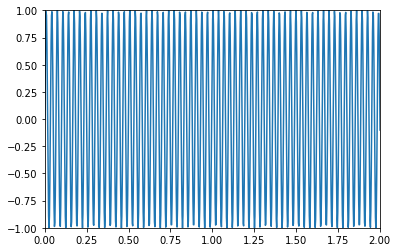

In [156]:
ts = np.arange(0, 500, .01)
f0 = 30
f1 = 250
T = 500
ts = ts = np.linspace(0, T, 200001)

k = (f1-f0)/T

ft2 = lambda t: (2 * np.pi * (k/2) * t + f0 * 2 * np.pi)

def Ft(t1):
    x = np.zeros(len(t1))
    for i in range(0,len(t1),1):
        x[i] = integrate.quad(ft2, 0, t1[i])[0]
    return x



print(Ft(ts))
#def ft(x):
#    return 10 + x
#y = ft(ts)

#def phit(a, b):
#    return quad(ft, a, b)
#sinesweep = np.sin(2 * np.pi * phit)
print(Ft([ts[100]]))

#plt.plot(ts, ft2(ts));
#plt.plot(ts, Ft(ts));

plt.plot(ts, np.sin(Ft(ts)))
plt.axis((0,2,-1,1))

(492, 498, -1, 1)

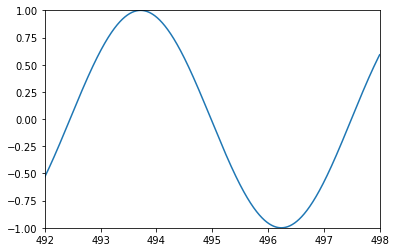

In [185]:
t = np.linspace(0, 500, 2000001)
plt.plot(t, chirp(t, f0= 30/1000, f1=200/1000, t1=500, method='linear', phi = -90))
plt.axis((492,498,-1,1))

In [164]:
dps = np.zeros(170)
freqs = np.arange(30,200,1)
print(len(dps), len(freqs))
dps = 1000/freqs
print(dps)

170 170
[ 33.33333333  32.25806452  31.25        30.3030303   29.41176471
  28.57142857  27.77777778  27.02702703  26.31578947  25.64102564  25.
  24.3902439   23.80952381  23.25581395  22.72727273  22.22222222
  21.73913043  21.27659574  20.83333333  20.40816327  20.          19.60784314
  19.23076923  18.86792453  18.51851852  18.18181818  17.85714286
  17.54385965  17.24137931  16.94915254  16.66666667  16.39344262
  16.12903226  15.87301587  15.625       15.38461538  15.15151515
  14.92537313  14.70588235  14.49275362  14.28571429  14.08450704
  13.88888889  13.69863014  13.51351351  13.33333333  13.15789474
  12.98701299  12.82051282  12.65822785  12.5         12.34567901
  12.19512195  12.04819277  11.9047619   11.76470588  11.62790698
  11.49425287  11.36363636  11.23595506  11.11111111  10.98901099
  10.86956522  10.75268817  10.63829787  10.52631579  10.41666667
  10.30927835  10.20408163  10.1010101   10.           9.9009901
   9.80392157   9.70873786   9.61538462   9.5238095

[  0.00000000e+00   2.50000000e-03   5.00000000e-03 ...,   4.99995000e+02
   4.99997500e+02   5.00000000e+02]
0.44
[  0.00000000e+00   8.63937980e-06   3.45575192e-05 ...,   3.45568280e+05
   3.45571736e+05   3.45575192e+05]


(0, 500, -1, 1)

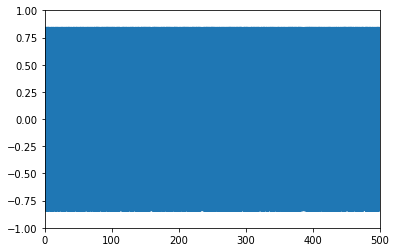

In [127]:

ts = np.linspace(0, 500, 200001)

ft = lambda t: (k/2)*t + f0

def sweep(t1):
    x = np.zeros(len(t1))
    for i in range(0,len(t1),1):
        x[i] = (2 * np.pi * (t1[i])**2 * (k/2) )#+ f0 * t1[i] * 2 * np.pi)
    return x

def sweep2(t1):
    return (2 * np.pi * (t1)**2 * (k/2) + f0 * t1 * 2 * np.pi)
#print(sweep(100))
#plt.plot(ts, np.sin(Ft2(ts)))
#plt.plot(ts, np.sin(Ft(ts)))
#plt.plot(ts, np.sin(Ft))
print(ts)
print(k)
print(sweep(ts))

plt.plot(ts, np.sin(sweep1(ts)))
plt.axis((0,500,-1,1))


In [73]:
print(2**3)

8


In [2]:
1000.0 / 81

12.345679012345679

In [8]:
37 / (1000.0 / 83)

3.0709999999999997

In [12]:
73 / (1000.0 / 96)

7.008

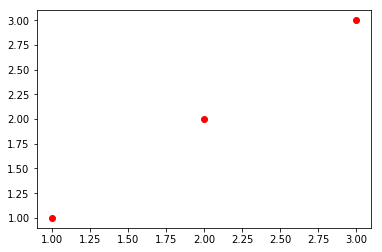

In [4]:
plt.plot([1,2,3], [1,2,3], 'o', color = 'red')

In [7]:
plt.legend?

In [ ]:
x2 = np.random.rand(10)
print(type(x2))
x2 = np.asarray([0,1,0,0,0,1,0,0,0,1])
print(type(x2))
print(type(walk))
print(len(x2), len(walk))
crossings = walk[np.logical_and(x2[:-1]==1, 1>x2[1:])]
crossings = walk[-1:][(x2[:-1]<1) & (1==x2[1:])]
crossings

In [ ]:
import numpy as np

signal = np.random.rand(1000000)
th = signal > 0.5
th[1:][th[:-1] & th[1:]] = False


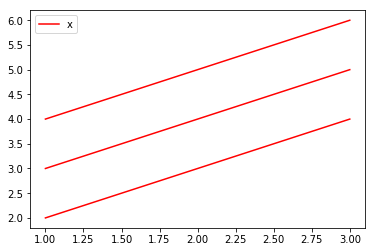

In [9]:
for i in (1,2,3):
    if i==1:
        plt.plot([1,2,3], [1+i,2+i,3+i], label = 'x', color = 'red')
    else:
        plt.plot([1,2,3], [1+i,2+i,3+i], color = 'red')
plt.legend()

In [18]:

#AOI of which we need a histogramm: I0 = 5, I1 = 8, f = {x1,x2,x3,...}


def spikeresponse_track(derivative, I0, I1, freq) :
    #tmax = 10000.0
    #tmax = 600.0
    tmax = 1000.0
    dt = 0.01
    time = np.arange(int(tmax/dt))*dt #[ 0, dt, 2dt, ... , (tmax / dt) dt = tmax]
    thresh = -20.0
    taus = 1.0 #changed taus as an input
    stime = np.arange(0.0, .025 * taus, dt) #spiketime: [0, dt, 2dt, ..., 8taus] WHY 8?
    spulse = (I1-I0) + 0 * stime

    rates = [] #creates empty array
    dp = 1000.0/freq          #period = distance of pulses (= 1000 ms / frequency)
    pulses = np.arange(0.0, tmax-(1.5*taus), dp) #pulses occuring between 0 and tmax-8taus with dist. dp
    current = np.zeros(len(time)) + I0 #current = I0 for all the time
    for pt in pulses: #loop through all the pulse-times
        current[int(pt/dt):int(pt/dt)+len(spulse)] += spulse
            #add spulse (growth) while current is between pt and pt + 8tau/dt (= back at rest. pot)
            # = adds a full spulse on the current to the next pulse (dimensions are perfectly fit)
    t, i, x = trajectory(derivative, -100.0, tmax, I0, current, -65.0, -65.0)
        #...
    spikes = t[:-1][(x[0][:-1]<thresh) & (x[0][1:]>=thresh)]
        #array of times where value just jumps over threshhold
    spikes = spikes[spikes>200.0] #only pick spikes, which occur for t>100ms
    rate = 0.0
    if len(spikes) > 2: #more han two spikes occur
        rate = 1000.0*(len(spikes)-1)/(spikes[-1]-spikes[0]) #
    rates.append(rate) #put all rate together in rates (evaluate one rate per frequency)
    
    print('firerate = {:.2f}'.format((rate/freq)))
    #return rates/freq

In [3]:

def trajectory(derivative, tmin, tmax, I0, I1, v0, u0) :
    deltat = 0.01
    time = np.arange(tmin, tmax, deltat)
    # = [tmin, tmin+deltat, tmin+2deltat, ..., tmax - deltat], len(time) = (tmax - tmin) / deltat
    x = np.zeros((2, len(time)))
    # 2-dim Array of len(time)x 0's x2
    current = np.zeros(len(time))
    # 1-dim Array of len(time)x 0's
    current[time<0.0] = I0
    # set current below time = 0 on I0
    current[time>=0.0] = I1
    # set current beginning at time = 0 on I1
    xx = [ v0, u0 ]
    for k in range(len(time)) :
        dVdt, dUdt = derivative(xx, current[k]) #gets changes in V and U for a certain current[time k]
        xx[0] += dVdt*deltat 
        xx[1] += dUdt*deltat #add these changes to the former values v0, u0
        x[0,k] = xx[0] #stores all changes in V ...
        x[1,k] = xx[1] #stores all changes in U untill tmax for every timestep
    return time, current, x #returns timearray, currentarray and updated v,u-array


In [4]:

plot = True
#plot = False

def kepler(x, I) : #inputs: resting potential v0,u0 , current[certaintime]
    GNa = 120.0
    GK = 36.0
    GL = 0.3
    ENa = +50.0
    EK = -77.0
    EL = -54.384
    C = 1.0 
    PT = 1.0

    V = x[0] #in trajectory this is resting potential -65 mV
    U = x[1]

    z = (U+55.0)/10.0
    ns = 1.0/(1.0+12.5*np.exp(-(U+65.0)/80.0)*0.1*(1.0 if abs(z) < 1e-4 else (1.0-np.exp(-z))/z))
    # ns = 1.0/(1.0+12.5*np.exp(-(U+65.0)/80.0)*(1.0-np.exp(-(U+55.0)/10.0))/(U+55.0))

    dU = 0.001
    z = (U+dU+55.0)/10.0
    nsU = 1.0/(1.0+12.5*np.exp(-(U+dU+65.0)/80.0)*0.1*(1.0 if abs(z) < 1e-4 else (1.0-np.exp(-z))/z))
    # nsU = 1.0/(1.0+12.5*np.exp(-(U+dU+65.0)/80.0)*(1.0-np.exp(-(U+dU+55.0)/10.0))/(U+dU+55.0))

    z = (V+55.0)/10.0
    nsV = 1.0/(1.0+12.5*np.exp(-(V+65.0)/80.0)*0.1*(1.0 if abs(z) < 1e-4 else (1.0-np.exp(-z))/z))
    # nsV = 1.0/(1.0+12.5*np.exp(-(V+65.0)/80.0)*(1.0-np.exp(-(V+55.0)/10.0))/(V+55.0))

    z = (V+40.0)/10.0
    ms = 1.0/(1.0+40.0*np.exp(-(V+65)/18.0)*0.1*(1.0 if abs(z) < 1e-4 else (1.0-np.exp(-z))/z))
    # ms = 1.0/(1.0+40.0*np.exp(-(V+65)/18.0)*(1.0-np.exp(-(V+40.0)/10.0))/(V+40.0))

    dV = 0.001
    z = (V+dV+40.0)/10.0
    msV = 1.0/(1.0+40.0*np.exp(-(V+dV+65)/18.0)*0.1*(1.0 if abs(z) < 1e-4 else (1.0-np.exp(-z))/z))
    # msV = 1.0/(1.0+40.0*np.exp(-(V+dV+65)/18.0)*(1.0-np.exp(-(V+dV+40.0)/10.0))/(V+dV+40.0))

    hs = 1.0/(1.0+1.0/(0.07*np.exp(-(U+65)/20.0)*(np.exp(-(U+35.0)/10.0)+1.0)))
    hsU = 1.0/(1.0+1.0/(0.07*np.exp(-(U+dU+65)/20.0)*(np.exp(-(U+dU+35.0)/10.0)+1.0)))
    hsV = 1.0/(1.0+1.0/(0.07*np.exp(-(V+65)/20.0)*(np.exp(-(V+35.0)/10.0)+1.0)))

    dgNa = GNa*ms*ms*ms*(V-ENa)
    dgK = GK*4.0*ns*ns*ns*(V-EK)
    th = 1.0/(0.07*np.exp(-(V+65.0)/20.0)+1.0/(np.exp(-(V+35.0)/10.0)+1.0))

    z = (V+55.0)/10.0
    tn = 1.0/(0.125*np.exp(-(V+65)/80.0)+0.1*(1.0 if abs(z) < 1e-4 else z/(1.0-np.exp(-z))))
    # tn = 1.0/(0.125*np.exp(-(V+65)/80.0)+0.01*(V+55.0)/(1.0-np.exp(-(V+55.0)/10.0)))

    z = (V+40.0)/10.0
    # tm = 1.0/(4.0*np.exp(-(V+65.0)/18.0)+0.1*(V+40.0)/(1.0-np.exp(-(V+40.0)/10.0)))
    tm = 1.0/(4.0*np.exp(-(V+65.0)/18.0)+(1.0 if abs(z) < 1e-4 else z/(1.0-np.exp(-z))))

    a = dgNa*(hsV-hs)/th+dgK*(nsV-ns)/tn
    b = dgNa*(hsU-hs)/dU+dgK*(nsU-ns)/dU

    g = GL + GK*ns*ns*ns*ns + GNa*ms*ms*ms*hs
    dFdVm = GNa*3.0*ms*ms*hs*(V-ENa)*(msV-ms)/dV
    alpha = 0.5*(C/tm+g - np.sqrt((C/tm+g)*(C/tm+g)-4.0*(g+dFdVm)*C/tm))/(g+dFdVm)

    GNaGates = GNa*ms*ms*ms*hs
    GKGates = GK*ns*ns*ns*ns

    INa = GNaGates*(V-ENa)
    IK = GKGates*(V-EK)
    IL = GL*(V-EL)

    dVdt = alpha * (-INa-IK-IL+I)/C    #Input I used 
    dUdt = a/b                         #independant of I

    return dVdt, dUdt                  #returns changes in V and U for a certain v0 and u0 and current[time k]

#HH-style

In [24]:
#for i in np.arange(130, 135, .1):
#    print('i = {}'.format(i))
#    spikeresponse_track(kepler, 5.0, i, 63)
    
for f in np.arange(60, 110, 1):
    print('f = {}'.format(f))
    spikeresponse_track(kepler, 5.0, 130.1, f)

f = 60
firerate = 0.00
f = 61
firerate = 0.00
f = 62
firerate = 0.00
f = 63
firerate = 1.00
f = 64
firerate = 1.00
f = 65
firerate = 1.00
f = 66
firerate = 1.00
f = 67
firerate = 0.77
f = 68
firerate = 0.68
f = 69
firerate = 0.60
f = 70
firerate = 0.60
f = 71
firerate = 0.55
f = 72
firerate = 0.51
f = 73
firerate = 0.48
f = 74
firerate = 0.49
f = 75
firerate = 0.45
f = 76
firerate = 0.43
f = 77
firerate = 0.40
f = 78
firerate = 0.40
f = 79
firerate = 0.38
f = 80
firerate = 0.36
f = 81
firerate = 0.35
f = 82
firerate = 0.33
f = 83
firerate = 0.33
f = 84
firerate = 0.33
f = 85
firerate = 0.33
f = 86
firerate = 0.33
f = 87
firerate = 0.33
f = 88
firerate = 0.33
f = 89
firerate = 0.33
f = 90
firerate = 0.33
f = 91
firerate = 0.33
f = 92
firerate = 0.33
f = 93
firerate = 0.33
f = 94
firerate = 0.33
f = 95
firerate = 0.33
f = 96
firerate = 0.39
f = 97
firerate = 0.43
f = 98
firerate = 0.47
f = 99
firerate = 0.45
f = 100
firerate = 0.50
f = 101
firerate = 0.50
f = 102
firerate = 0.50
f = 103


In [26]:
for f in np.arange(60, 110, 1):
    print('f = {}'.format(f))
    spikeresponse_track(kepler, 5.0, 130.0, f)

f = 60
firerate = 0.00
f = 61
firerate = 0.00
f = 62
firerate = 0.00
f = 63
firerate = 0.00
f = 64
firerate = 1.00
f = 65
firerate = 1.00
f = 66
firerate = 1.00
f = 67
firerate = 0.77
f = 68
firerate = 0.74
f = 69
firerate = 0.65
f = 70
firerate = 0.57
f = 71
firerate = 0.54
f = 72
firerate = 0.51
f = 73
firerate = 0.48
f = 74
firerate = 0.47
f = 75
firerate = 0.45
f = 76
firerate = 0.43
f = 77
firerate = 0.40
f = 78
firerate = 0.40
f = 79
firerate = 0.38
f = 80
firerate = 0.37
f = 81
firerate = 0.37
f = 82
firerate = 0.33
f = 83
firerate = 0.33
f = 84
firerate = 0.33
f = 85
firerate = 0.33
f = 86
firerate = 0.33
f = 87
firerate = 0.33
f = 88
firerate = 0.33
f = 89
firerate = 0.33
f = 90
firerate = 0.33
f = 91
firerate = 0.33
f = 92
firerate = 0.33
f = 93


KeyboardInterrupt: 

In [11]:
rec = [130.5, 130.5, 113.5]
periodic = True
for i in range(0, len(rec)-1, 1):
            if np.round(rec[i], -2) != np.round(rec[i+1], -2):
                periodic = False
            print(np.round(rec[i], -1))
            print(np.round(rec[i+1], -1))

print(periodic)

130.0
130.0
130.0
110.0
True


[  59.   60.   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.
   71.   72.   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.
   83.   84.   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.
   95.   96.   97.   98.   99.  100.  101.  102.  103.  104.  105.  106.
  107.  108.  109.]


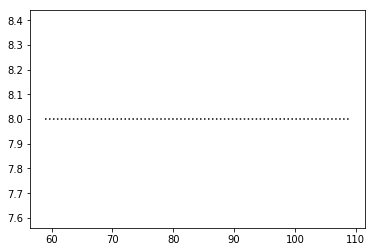

In [7]:
df, di = 1, .1 #for testsituation
f0, f1 = 58, 110
i0, i1 = 6.3, 9.2

fgrid, igrid = np.mgrid[slice(f0, f1 + df, df), slice(i0, i1 + di, di)]
print(fgrid[1:-1,1])
plt.plot(fgrid[1:-1,1], np.zeros(len(fgrid[1:-1,1]))+8.0, ls = 'dotted', color = 'black')

In [7]:
a = 1
b = 2

In [11]:
a += 1
b += 1
print(a, b)

2 3
